In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

In [38]:
# def time_start(name_file):
#     file_tsv = name_file[:-3]+'tsv'
#     # Đọc tệp TSV bằng pandas
#     # print(file_tsv)
#     df = pd.read_csv(file_tsv, delimiter='\t')
#     df=df.iloc
#     df0 = df[:,0]
#     df2 = df[:,2]
#     for i in range(len(df2)):
#         if(df2[i]==1):
#             time = df0[i]
#             break
#     return df0[i]

In [39]:
### Chia file.wav ra moi folder

# data = 'training_data'

# out_file = 'training_data_all/'
# for file in os.listdir(data):
#     if(file.endswith(".wav") == True):

#         name_file = os.path.join(data,file)
#         time_begin = (time_start(name_file))
#         file_txt = (name_file.split('_')[0])+'_'+(name_file.split('_')[1])+'.txt'
#         # print(file_txt)
#         df = pd.read_csv(file_txt)
#         df=np.array(df)
#         # print(df)
#         if (df == '#Murmur: Absent').any().any():
#             # print('Absent')
#             shutil.copy(name_file, out_file +'Absent/'+str(time_begin)+'_'+file)
#         elif (df == '#Murmur: Present').any().any():
#             # print('Present')
#             shutil.copy(name_file, out_file +'Present/'+str(time_begin)+'_'+file)
#         elif (df == '#Murmur: Unknown').any().any():
#             # print('Unknown')
#             shutil.copy(name_file, out_file +'Unknown/'+str(time_begin)+'_'+file)

In [40]:
""" 
/training_data_all
        --->Unknown
        --->Absent
        --->Present
"""

' \n/training_data_all\n        --->Unknown\n        --->Absent\n        --->Present\n'

In [321]:
def show_spectrogram (file,n_fft,n_mels,hop_lenght):
    time = 2
    audio, sr = librosa.load(file,sr=4000)
    audio = audio[sr*time:sr*time*2]
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_fft= n_fft ,n_mels=n_mels,hop_length=hop_lenght)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram ,ref=np.max)
    print(mel_spectrogram_db.shape)
    fig, ax = plt.subplots(figsize=(5,2))
    a =librosa.display.specshow(mel_spectrogram_db,
                            x_axis='time',
                            y_axis='linear',
                            sr=sr,
                            hop_length=512,
                            )
    plt.title("Audio Spectrogram Representation")
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()


(64, 64)


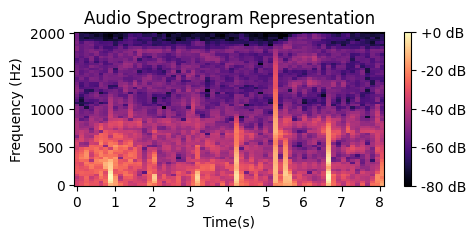

(64, 64)


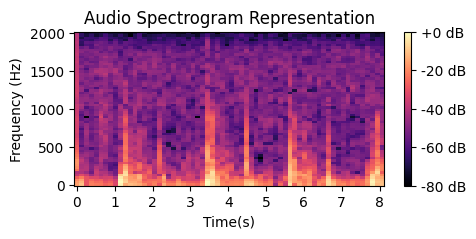

(64, 64)


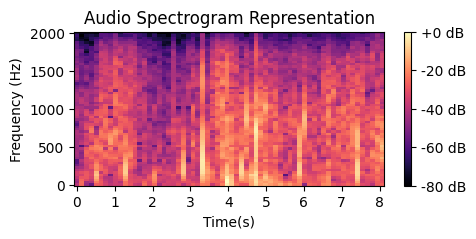

In [333]:
def show (n_fft ,n_mels,hop_lenght):
    audio_file_absent = "training_data_all/Absent/0.04025_49970_MV.wav"
    audio_file_present = "training_data_all/Present/0.08025_68255_TV.wav"
    audio_file_unknown = "training_data_all/Unknown/0.83_85081_MV.wav"
    show_spectrogram(audio_file_absent,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
    show_spectrogram(audio_file_present,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
    show_spectrogram(audio_file_unknown,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
show(n_fft = 128 ,n_mels=64,hop_lenght=126)

In [43]:
# data_train = 'training_data_all'
# data_time = []
# for folders in os.listdir(data_train):
#     print(folders)
#     name_folders = os.path.join(data_train,folders)
#     for file in os.listdir(name_folders):
#         name_files = os.path.join(name_folders,file)
#         y,sr = librosa.load(name_files,sr=4000)
#         audio_duration = (len(y)/sr)
#         data_time.append(audio_duration)

# np.min(data_time)

In [334]:
def create_data (audio,file,sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_fft= 128 ,n_mels=64,hop_length=126)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram ,ref=np.max)
    # mel_spectrogram_db = mel_spectrogram_db.reshape([128,128,1])
    x_data.append(mel_spectrogram_db)


In [335]:
def split_audio(name_files,file,time_limit,sr):
    audio, sr = librosa.load(name_files, sr=sr)
    file = file[:-4]
    segment_length = time_limit * sr
    num_segments = (len(audio) // segment_length)
    for i in range(num_segments):
        start_sample = i * segment_length
        end_sample = (i + 1) * segment_length

        segment = audio[start_sample:end_sample]
        create_data(segment,file,sr)
        label = name_files.split('/')[1]
        get_label(label)

In [336]:
def get_label(label):
    # print(folders)
    y_data.append(label)

In [337]:
def get_date(name_files,file,time_limit,sr):
    # print(name_files)
    split_audio(name_files,file,time_limit,sr)

In [347]:
data_train = 'training_data_all'
x_data = []
y_data = []
for folders in os.listdir(data_train):
    print(folders)
    name_folders = os.path.join(data_train,folders)
    for file in os.listdir(name_folders):
        name_files = os.path.join(name_folders,file)
        get_date(name_files,file,time_limit = 2,sr = 4000)


file = open('data_file.csv','wb')
pickle.dump((x_data,y_data),file)
file.close()

Unknown
Absent
Present


In [348]:
file = open('data_file.csv', 'rb')
data = pickle.load(file)
x_data,y_data =data
file.close()
x_data=np.array(x_data)
y_data = np.array(y_data)

In [349]:
from collections import Counter

counters = Counter(y_data)

for value, count in counters.items():
    print(f"{value} xuất hiện {count}")

Unknown xuất hiện 1662
Absent xuất hiện 26348
Present xuất hiện 6548


In [350]:
x_data=np.array(x_data)
y_data=np.array(y_data)
print(x_data.shape)
print(y_data.shape)

(34558, 64, 64)
(34558,)


In [351]:
x_test = []
y_test = []
x_train = []
y_train = []

In [352]:
encoder = LabelBinarizer()
y_data=encoder.fit_transform(y_data)


# Sử dụng StratifiedShuffleSplit để chia dữ liệu theo tỷ lệ
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=68)

# Lặp qua các chỉ số của tập huấn luyện và tập kiểm tra
for train_index, test_index in sss.split(x_data, y_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

In [353]:
input_shape = x_test[1].shape
print(input_shape)

(64, 64)


In [354]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, Dropout,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))


model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))


model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64, return_sequences=False))  

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax')) 


model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_72 (Conv1D)          (None, 64, 64)            20544     
                                                                 
 max_pooling1d_72 (MaxPooli  (None, 32, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_73 (Conv1D)          (None, 32, 128)           41088     
                                                                 
 max_pooling1d_73 (MaxPooli  (None, 16, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_74 (Conv1D)          (None, 16, 256)           164096    
                                                                 
 max_pooling1d_74 (MaxPooli  (None, 8, 256)          

In [355]:
history = model.fit(x_train,y_train,batch_size=128, epochs=80,validation_data=(x_test, y_test), callbacks=[model_checkpoint])

Epoch 1/80


2023-10-30 13:18:18.732088: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-10-30 13:18:19.544794: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 810.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


189/189 [==============================] - ETA: 0s - loss: 0.1214 - accuracy: 0.7700
Epoch 1: val_accuracy improved from -inf to 0.42477, saving model to best_model.h5
189/189 [==============================] - 7s 18ms/step - loss: 0.1214 - accuracy: 0.7700 - val_loss: 0.2015 - val_accuracy: 0.4248
Epoch 2/80
 11/189 [>.............................] - ETA: 1s - loss: 0.1180 - accuracy: 0.7734

/home/duyphuoc/Desktop/heart_sound_new/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.7885
Epoch 2: val_accuracy improved from 0.42477 to 0.77508, saving model to best_model.h5
189/189 [==============================] - 2s 13ms/step - loss: 0.1121 - accuracy: 0.7885 - val_loss: 0.1199 - val_accuracy: 0.7751
Epoch 3/80
186/189 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.8069
Epoch 3: val_accuracy did not improve from 0.77508
189/189 [==============================] - 2s 12ms/step - loss: 0.1043 - accuracy: 0.8066 - val_loss: 0.1207 - val_accuracy: 0.7628
Epoch 4/80
186/189 [============================>.] - ETA: 0s - loss: 0.1022 - accuracy: 0.8092
Epoch 4: val_accuracy improved from 0.77508 to 0.79225, saving model to best_model.h5
189/189 [==============================] - 2s 13ms/step - loss: 0.1022 - accuracy: 0.8092 - val_loss: 0.1170 - val_accuracy: 0.7922
Epoch 5/80
185/189 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.8124
Epoch 5: